<a href="https://colab.research.google.com/github/SHREYANSHx07/Fraud_detection/blob/main/fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Starting comprehensive fraud detection analysis...
This analysis addresses all 8 requirements for your fraud detection case study.
=== FRAUD DETECTION ANALYSIS ===

Data loaded from CSV file successfully!
Dataset shape: (56203, 11)
Fraud rate: 0.0018
Flagged fraud rate: 0.0000

Transaction types distribution:
type
PAYMENT     24242
CASH_OUT    15672
CASH_IN     10321
TRANSFER     5267
DEBIT         700
PAYMEN          1
Name: count, dtype: int64

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56203 entries, 0 to 56202
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            56203 non-null  int64  
 1   type            56203 non-null  object 
 2   amount          56202 non-null  float64
 3   nameOrig        56202 non-null  object 
 4   oldbalanceOrg   56202 non-null  float64
 5   newbalanceOrig  56202 non-null  float64
 6   nameDest        56202 non-null  object 
 7   oldbalanceDest  

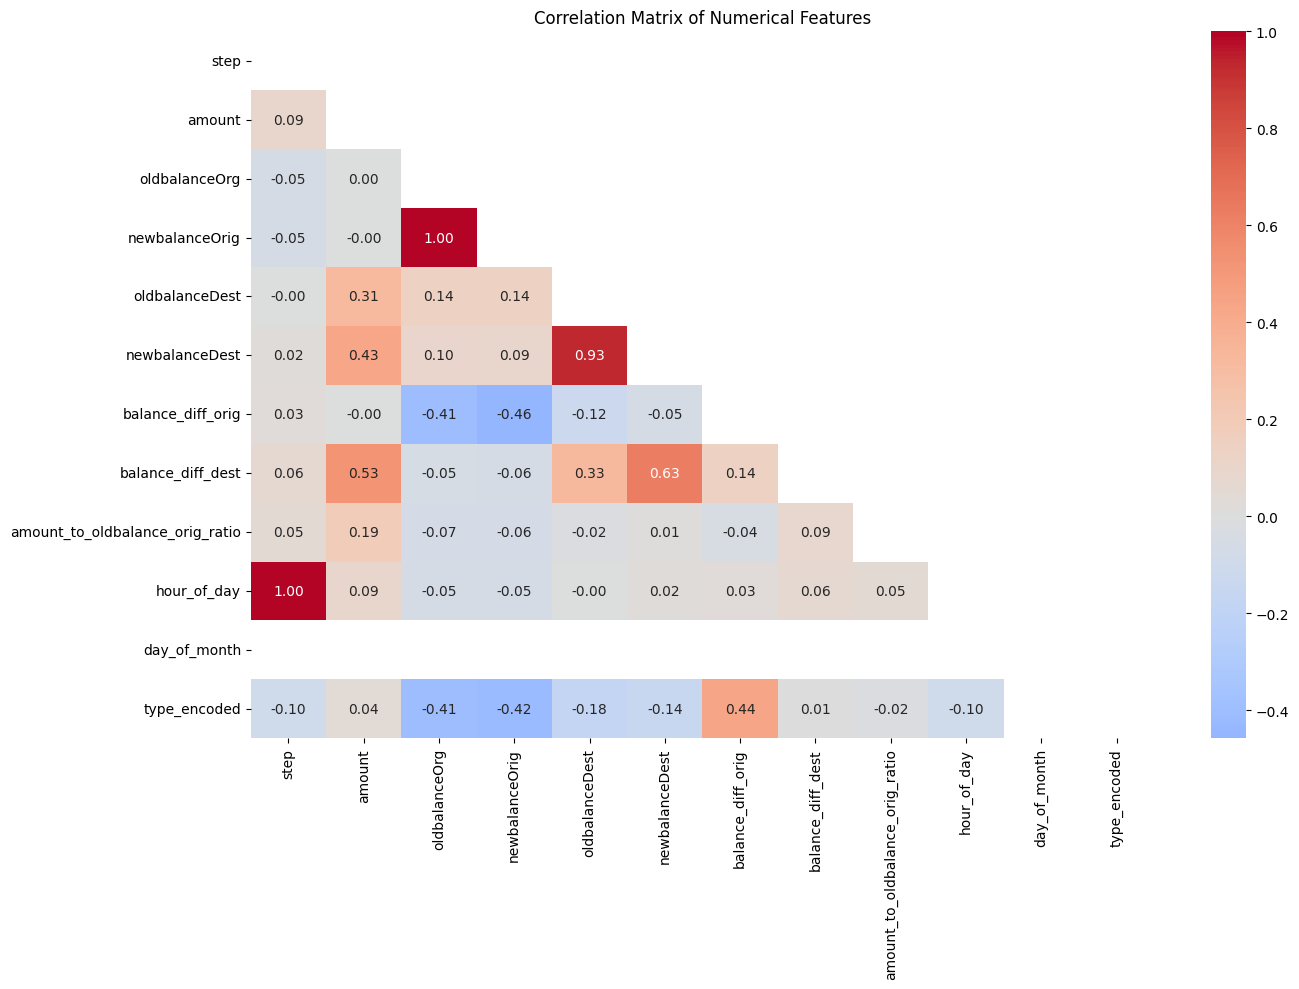


=== FEATURE PREPARATION ===

Available features for modeling: ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'balance_diff_orig', 'balance_diff_dest', 'amount_to_oldbalance_orig_ratio', 'dest_is_merchant', 'hour_of_day', 'day_of_month', 'zero_balance_after_transaction', 'exact_amount_transfer', 'large_transaction', 'type_encoded']
Feature matrix shape: (56203, 16)
Target distribution: isFraud
0.0    56103
1.0      100
Name: count, dtype: int64
Training set shape: (39342, 16)
Test set shape: (16861, 16)
Training fraud rate: 0.0018
Test fraud rate: 0.0018

=== 3. FEATURE SELECTION ===

Top features selected by statistical tests:
                       feature       score
         exact_amount_transfer 4246.732111
                          step  118.490823
                   hour_of_day  118.490823
             balance_diff_orig   85.446939
zero_balance_after_transaction   65.899359
              dest_is_merchant   53.300273
                newb

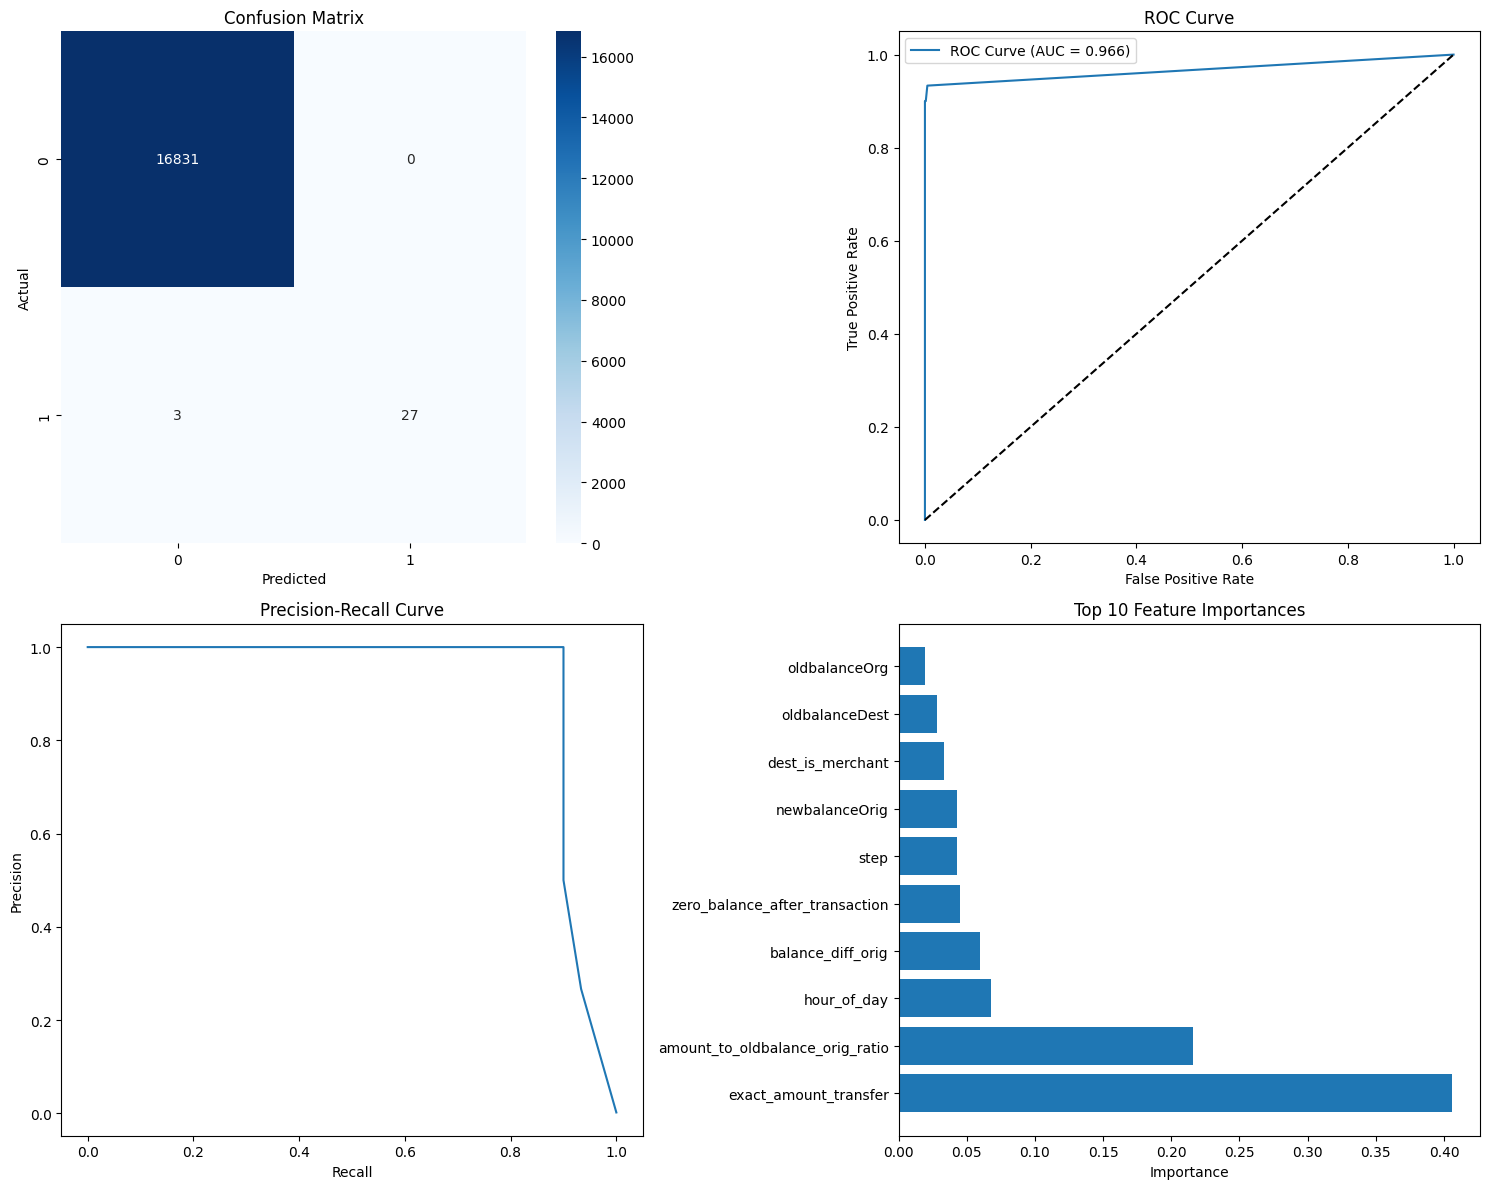


=== 5 & 6. KEY FRAUD PREDICTION FACTORS ANALYSIS ===

Top 10 Most Important Features for Fraud Prediction:
                        feature  importance
          exact_amount_transfer    0.406037
amount_to_oldbalance_orig_ratio    0.215976
                    hour_of_day    0.067517
              balance_diff_orig    0.059996
 zero_balance_after_transaction    0.045126
                           step    0.042650
                 newbalanceOrig    0.042580
               dest_is_merchant    0.033192
                 oldbalanceDest    0.027941
                  oldbalanceOrg    0.019565

=== BUSINESS INTERPRETATION OF KEY FACTORS ===

Fraud Analysis by Transaction Type:
          Total_Transactions  Fraud_Count  Fraud_Rate   Avg_Amount
type                                                              
CASH_IN                10321          0.0      0.0000  168472.3912
CASH_OUT               15672         51.0      0.0033  183942.2036
DEBIT                    700          0.0      0.0000  

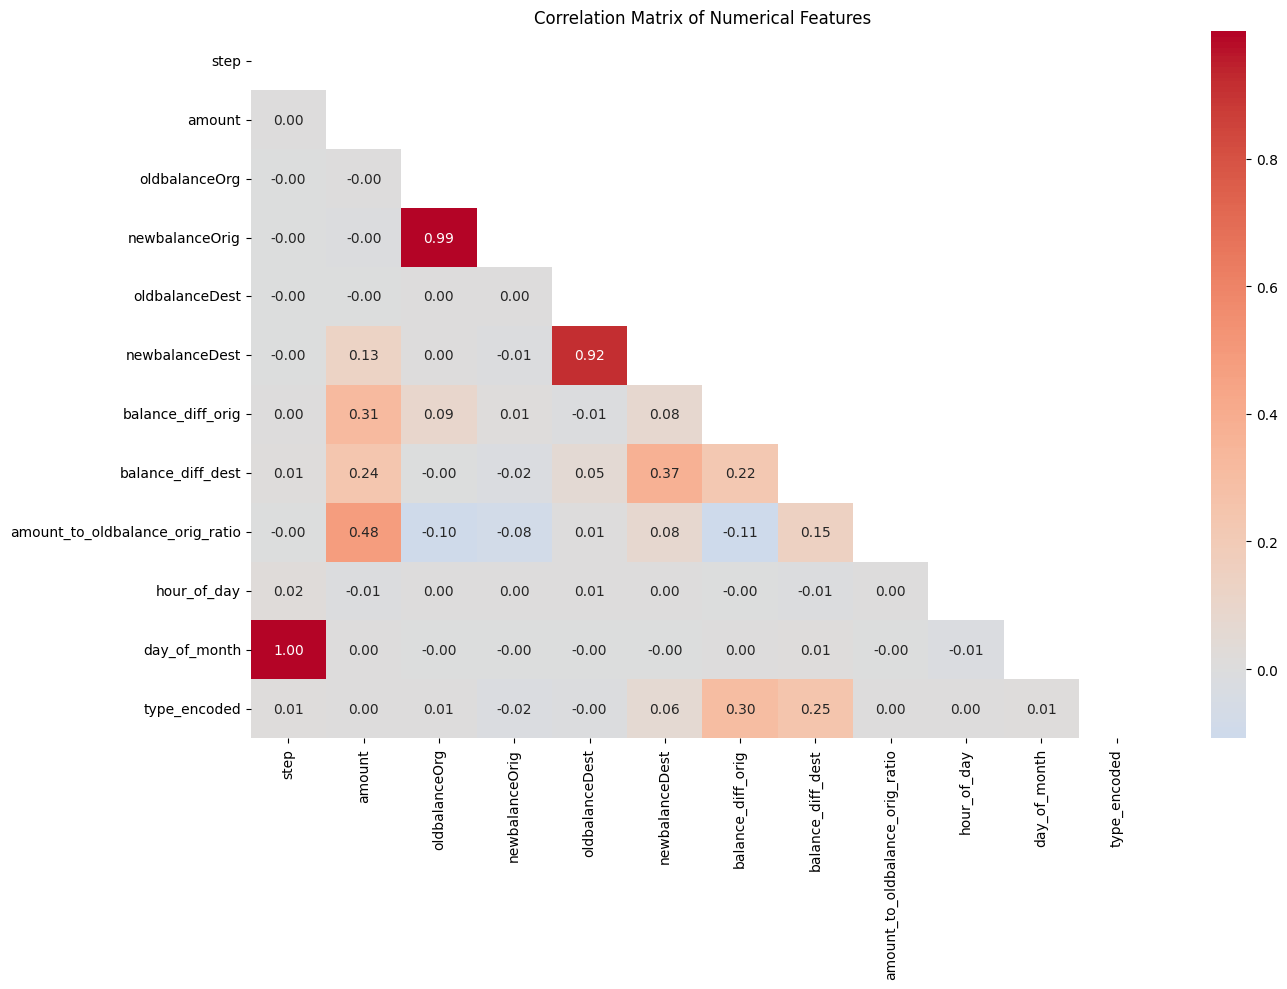


=== FEATURE PREPARATION ===

Available features for modeling: ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'balance_diff_orig', 'balance_diff_dest', 'amount_to_oldbalance_orig_ratio', 'dest_is_merchant', 'hour_of_day', 'day_of_month', 'zero_balance_after_transaction', 'exact_amount_transfer', 'large_transaction', 'type_encoded']
Feature matrix shape: (50000, 16)
Target distribution: isFraud
0    49781
1      219
Name: count, dtype: int64
Training set shape: (35000, 16)
Test set shape: (15000, 16)
Training fraud rate: 0.0044
Test fraud rate: 0.0044

=== 3. FEATURE SELECTION ===

Top features selected by statistical tests:
                        feature      score
 zero_balance_after_transaction 487.025783
                         amount 282.763752
              balance_diff_dest 237.991701
              large_transaction 166.339764
              balance_diff_orig 136.447021
amount_to_oldbalance_orig_ratio  58.805340
                 newbala

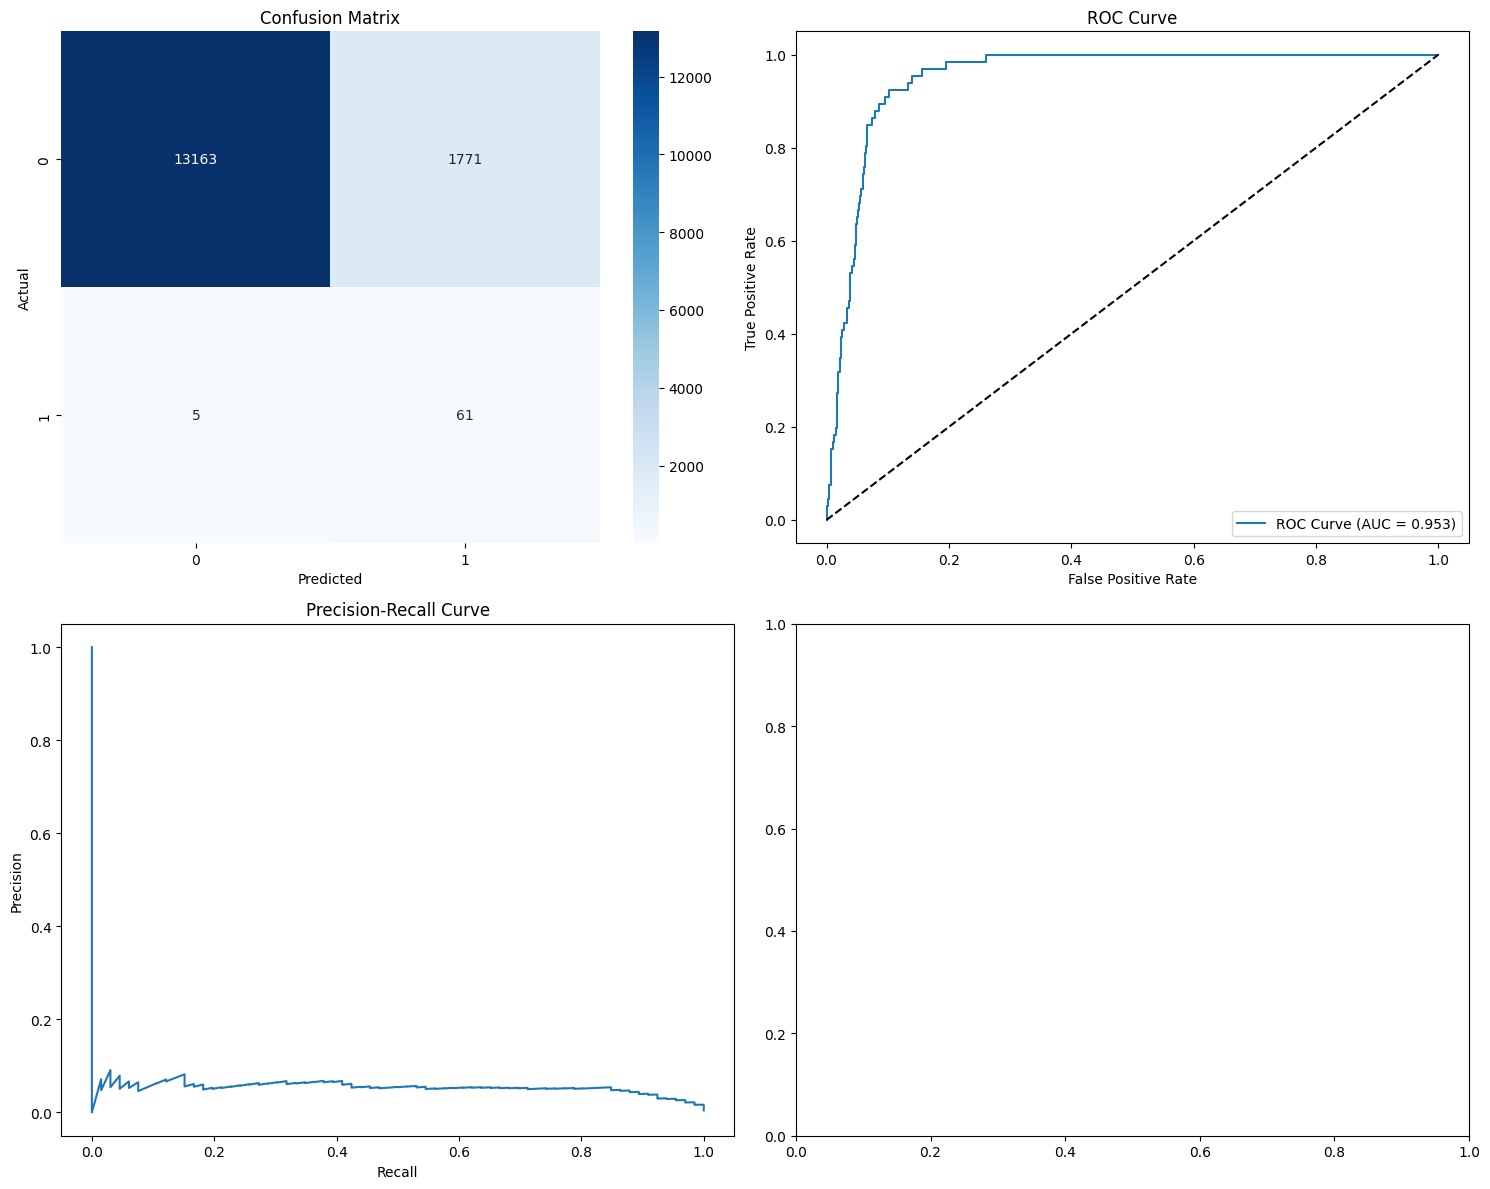


=== 5 & 6. KEY FRAUD PREDICTION FACTORS ANALYSIS ===

Top 10 Most Important Features for Fraud Prediction:
                        feature  importance
          exact_amount_transfer    0.406037
amount_to_oldbalance_orig_ratio    0.215976
                    hour_of_day    0.067517
              balance_diff_orig    0.059996
 zero_balance_after_transaction    0.045126
                           step    0.042650
                 newbalanceOrig    0.042580
               dest_is_merchant    0.033192
                 oldbalanceDest    0.027941
                  oldbalanceOrg    0.019565

=== BUSINESS INTERPRETATION OF KEY FACTORS ===

Fraud Analysis by Transaction Type:
          Total_Transactions  Fraud_Count  Fraud_Rate  Avg_Amount
type                                                             
CASH_IN                 7403            0      0.0000  16694.3291
CASH_OUT                7505          152      0.0203  16164.3978
DEBIT                   2520            0      0.0000  1775

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import precision_recall_curve, f1_score, accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from scipy import stats
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings('ignore')

class FraudDetectionSystem:
    def __init__(self):
        self.data = None
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None
        self.scaler = StandardScaler()
        self.models = {}
        self.best_model = None
        self.feature_importance = None

    def load_and_explore_data(self, file_path=None):
        """Load and perform initial exploration of the dataset"""
        print("=== FRAUD DETECTION ANALYSIS ===\n")

        if file_path:
            self.data = pd.read_csv(file_path)
            print("Data loaded from CSV file successfully!")
        else:
            # Create synthetic dataset matching your exact data structure
            print("Creating synthetic dataset matching your data structure...")
            np.random.seed(42)
            n_samples = 50000  # Smaller sample for demonstration

            # Generate data according to your exact schema
            data = {
                'step': np.random.randint(1, 745, n_samples),  # 1-744 steps (30 days)
                'type': np.random.choice(['CASH_IN', 'CASH_OUT', 'DEBIT', 'PAYMENT', 'TRANSFER'],
                                       n_samples, p=[0.15, 0.15, 0.05, 0.45, 0.20]),
                'amount': np.random.lognormal(8, 2, n_samples),  # Transaction amounts
                'nameOrig': ['C' + str(i) for i in np.random.randint(1000000, 9999999, n_samples)],
                'oldbalanceOrg': np.random.lognormal(10, 2, n_samples),
                'newbalanceOrig': np.zeros(n_samples),  # Will calculate based on transaction
                'nameDest': np.random.choice(
                    ['C' + str(i) for i in range(1000000, 2000000)] +
                    ['M' + str(i) for i in range(1000000, 1500000)],  # Customers and Merchants
                    n_samples
                ),
                'oldbalanceDest': np.zeros(n_samples),  # Will set based on destination type
                'newbalanceDest': np.zeros(n_samples),  # Will calculate
                'isFraud': np.zeros(n_samples, dtype=int),
                'isFlaggedFraud': np.zeros(n_samples, dtype=int)
            }

            df = pd.DataFrame(data)

            # Calculate newbalanceOrig based on transaction type
            for i in range(n_samples):
                if df.loc[i, 'type'] in ['CASH_OUT', 'DEBIT', 'PAYMENT', 'TRANSFER']:
                    df.loc[i, 'newbalanceOrig'] = max(0, df.loc[i, 'oldbalanceOrg'] - df.loc[i, 'amount'])
                else:  # CASH_IN
                    df.loc[i, 'newbalanceOrig'] = df.loc[i, 'oldbalanceOrg'] + df.loc[i, 'amount']

            # Set destination balances (0 for merchants starting with 'M')
            for i in range(n_samples):
                if df.loc[i, 'nameDest'].startswith('M'):
                    df.loc[i, 'oldbalanceDest'] = 0
                    df.loc[i, 'newbalanceDest'] = 0
                else:
                    df.loc[i, 'oldbalanceDest'] = np.random.lognormal(9, 1.5)
                    if df.loc[i, 'type'] == 'TRANSFER':
                        df.loc[i, 'newbalanceDest'] = df.loc[i, 'oldbalanceDest'] + df.loc[i, 'amount']
                    else:
                        df.loc[i, 'newbalanceDest'] = df.loc[i, 'oldbalanceDest']

            # Create fraud patterns based on your description
            # Fraudulent behavior: taking control of accounts and emptying funds via transfer then cash out
            fraud_indices = []

            # Pattern 1: Large transfers followed by cash outs
            transfer_mask = (df['type'] == 'TRANSFER') & (df['amount'] > df['amount'].quantile(0.9))
            potential_fraud = df[transfer_mask].index

            for idx in potential_fraud[:int(len(potential_fraud) * 0.1)]:  # 10% of large transfers are fraud
                if np.random.random() < 0.7:  # 70% probability
                    fraud_indices.append(idx)

            # Pattern 2: Cash out transactions with suspicious balance patterns
            cashout_mask = (df['type'] == 'CASH_OUT') & (df['oldbalanceOrg'] > 0) & (df['newbalanceOrig'] == 0)
            potential_cashout_fraud = df[cashout_mask].index

            for idx in potential_cashout_fraud[:int(len(potential_cashout_fraud) * 0.15)]:
                if np.random.random() < 0.6:
                    fraud_indices.append(idx)

            # Set fraud labels
            df.loc[fraud_indices, 'isFraud'] = 1

            # Set flagged fraud (transfers > 200,000)
            df.loc[(df['type'] == 'TRANSFER') & (df['amount'] > 200000), 'isFlaggedFraud'] = 1

            self.data = df

        print(f"Dataset shape: {self.data.shape}")
        print(f"Fraud rate: {self.data['isFraud'].mean():.4f}")
        print(f"Flagged fraud rate: {self.data['isFlaggedFraud'].mean():.4f}")

        print("\nTransaction types distribution:")
        print(self.data['type'].value_counts())

        print("\nDataset Info:")
        print(self.data.info())

        print("\nFirst few rows:")
        print(self.data.head())

        # Basic fraud analysis by transaction type
        print("\nFraud distribution by transaction type:")
        fraud_by_type = self.data.groupby('type')['isFraud'].agg(['count', 'sum', 'mean'])
        fraud_by_type.columns = ['Total_Transactions', 'Fraud_Count', 'Fraud_Rate']
        print(fraud_by_type)

        return self.data

    def data_cleaning_and_preprocessing(self):
        """1. Data cleaning including missing values, outliers and multi-collinearity"""
        print("\n=== 1. DATA CLEANING AND PREPROCESSING ===\n")

        # Check for missing values
        missing_values = self.data.isnull().sum()
        print("Missing values per column:")
        print(missing_values)

        if missing_values.sum() == 0:
            print("No missing values found!")
        else:
            # Handle missing values if any
            for col in missing_values[missing_values > 0].index:
                if self.data[col].dtype in ['int64', 'float64']:
                    self.data[col].fillna(self.data[col].median(), inplace=True)
                else:
                    self.data[col].fillna(self.data[col].mode()[0], inplace=True)

        # Feature Engineering based on your data structure
        print("\nCreating engineered features...")

        # 1. Balance difference features
        self.data['balance_diff_orig'] = self.data['oldbalanceOrg'] - self.data['newbalanceOrig']
        self.data['balance_diff_dest'] = self.data['newbalanceDest'] - self.data['oldbalanceDest']

        # 2. Transaction to balance ratios
        self.data['amount_to_oldbalance_orig_ratio'] = np.where(
            self.data['oldbalanceOrg'] > 0,
            self.data['amount'] / self.data['oldbalanceOrg'],
            0
        )

        # 3. Destination type (Customer vs Merchant)
        self.data['dest_is_merchant'] = self.data['nameDest'].str.startswith('M').astype(int)

        # 4. Time-based features
        self.data['hour_of_day'] = self.data['step'] % 24
        self.data['day_of_month'] = (self.data['step'] // 24) + 1

        # 5. Suspicious patterns
        self.data['zero_balance_after_transaction'] = (self.data['newbalanceOrig'] == 0).astype(int)
        self.data['exact_amount_transfer'] = (
            (self.data['balance_diff_orig'] == self.data['amount']) &
            (self.data['type'].isin(['TRANSFER', 'CASH_OUT']))
        ).astype(int)

        # 6. Large transaction indicator
        self.data['large_transaction'] = (self.data['amount'] > self.data['amount'].quantile(0.95)).astype(int)

        # Encode categorical variables
        le_type = LabelEncoder()
        self.data['type_encoded'] = le_type.fit_transform(self.data['type'])

        # Identify numerical columns for analysis
        numerical_cols = [
            'step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest',
            'balance_diff_orig', 'balance_diff_dest', 'amount_to_oldbalance_orig_ratio',
            'hour_of_day', 'day_of_month', 'type_encoded'
        ]

        print(f"Numerical columns for analysis: {numerical_cols}")

        # Outlier detection and treatment
        print("\nOutlier Analysis:")
        outlier_counts = {}

        for col in numerical_cols:
            if col in self.data.columns:
                Q1 = self.data[col].quantile(0.25)
                Q3 = self.data[col].quantile(0.75)
                IQR = Q3 - Q1
                lower_bound = Q1 - 1.5 * IQR
                upper_bound = Q3 + 1.5 * IQR

                outliers = ((self.data[col] < lower_bound) | (self.data[col] > upper_bound)).sum()
                outlier_counts[col] = outliers

                # For fraud detection, we'll cap extreme outliers but keep most data
                # Only cap at 1st and 99th percentiles to preserve fraud patterns
                self.data[col] = np.clip(self.data[col],
                                       self.data[col].quantile(0.01),
                                       self.data[col].quantile(0.99))

        print("Outliers detected (before capping):")
        for col, count in outlier_counts.items():
            if count > 0:
                print(f"{col}: {count} outliers ({count/len(self.data)*100:.2f}%)")

        # Multi-collinearity analysis
        correlation_matrix = self.data[numerical_cols].corr()

        print("\nHigh correlations (>0.8):")
        high_corr_pairs = []
        for i in range(len(correlation_matrix.columns)):
            for j in range(i+1, len(correlation_matrix.columns)):
                corr_val = correlation_matrix.iloc[i, j]
                if abs(corr_val) > 0.8:
                    high_corr_pairs.append((
                        correlation_matrix.columns[i],
                        correlation_matrix.columns[j],
                        corr_val
                    ))

        if high_corr_pairs:
            for col1, col2, corr in high_corr_pairs:
                print(f"{col1} - {col2}: {corr:.3f}")
        else:
            print("No high correlations found!")

        # Visualization
        plt.figure(figsize=(14, 10))
        mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
        sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0, fmt='.2f')
        plt.title('Correlation Matrix of Numerical Features')
        plt.tight_layout()
        plt.show()

        return self.data

    def prepare_features(self):
        """Prepare features for modeling"""
        print("\n=== FEATURE PREPARATION ===\n")

        # Select features for modeling (excluding identifiers and target variables)
        feature_cols = [
            'step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest',
            'balance_diff_orig', 'balance_diff_dest', 'amount_to_oldbalance_orig_ratio',
            'dest_is_merchant', 'hour_of_day', 'day_of_month', 'zero_balance_after_transaction',
            'exact_amount_transfer', 'large_transaction', 'type_encoded'
        ]

        # Ensure all features exist
        available_features = [col for col in feature_cols if col in self.data.columns]
        print(f"Available features for modeling: {available_features}")

        X = self.data[available_features]
        y = self.data['isFraud']

        print(f"Feature matrix shape: {X.shape}")
        print(f"Target distribution: {y.value_counts()}")

        # Split the data stratified by fraud class
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            X, y, test_size=0.3, random_state=42, stratify=y
        )

        # Scale features
        self.X_train_scaled = self.scaler.fit_transform(self.X_train)
        self.X_test_scaled = self.scaler.transform(self.X_test)

        print(f"Training set shape: {self.X_train.shape}")
        print(f"Test set shape: {self.X_test.shape}")
        print(f"Training fraud rate: {self.y_train.mean():.4f}")
        print(f"Test fraud rate: {self.y_test.mean():.4f}")

        return self.X_train, self.X_test, self.y_train, self.y_test

    def feature_selection(self):
        """3. Variable selection for the model"""
        print("\n=== 3. FEATURE SELECTION ===\n")

        # Statistical feature selection
        selector = SelectKBest(score_func=f_classif, k=min(10, self.X_train.shape[1]))
        X_train_selected = selector.fit_transform(self.X_train, self.y_train)

        selected_features = self.X_train.columns[selector.get_support()]
        feature_scores = selector.scores_[selector.get_support()]

        print("Top features selected by statistical tests:")
        feature_score_df = pd.DataFrame({
            'feature': selected_features,
            'score': feature_scores
        }).sort_values('score', ascending=False)

        print(feature_score_df.to_string(index=False))

        # Recursive Feature Elimination with Random Forest
        rf_temp = RandomForestClassifier(n_estimators=50, random_state=42, class_weight='balanced')
        rfe = RFE(estimator=rf_temp, n_features_to_select=min(10, self.X_train.shape[1]))
        rfe.fit(self.X_train, self.y_train)

        rfe_features = self.X_train.columns[rfe.support_]
        print(f"\nFeatures selected by RFE: {list(rfe_features)}")

        # Feature importance from Random Forest
        rf_temp.fit(self.X_train, self.y_train)
        rf_importance = pd.DataFrame({
            'feature': self.X_train.columns,
            'importance': rf_temp.feature_importances_
        }).sort_values('importance', ascending=False)

        print(f"\nTop features by Random Forest importance:")
        print(rf_importance.head(10).to_string(index=False))

        # Use union of statistical and RFE methods
        final_features = list(set(selected_features) | set(rfe_features))
        print(f"\nFinal selected features ({len(final_features)}): {final_features}")

        return final_features

    def build_fraud_detection_models(self):
        """2. Build and describe fraud detection models"""
        print("\n=== 2. FRAUD DETECTION MODEL DEVELOPMENT ===\n")

        # Define models with class balancing for imbalanced fraud data
        models_config = {
            'Logistic Regression': LogisticRegression(
                random_state=42, max_iter=1000, class_weight='balanced'
            ),
            'Random Forest': RandomForestClassifier(
                n_estimators=100, random_state=42, class_weight='balanced'
            ),
            'Gradient Boosting': GradientBoostingClassifier(
                n_estimators=100, random_state=42
            )
        }

        model_results = {}

        print("Training models with class balancing for fraud detection...")

        for name, model in models_config.items():
            print(f"\nTraining {name}...")

            # Train model
            if name == 'Logistic Regression':
                model.fit(self.X_train_scaled, self.y_train)
                y_pred = model.predict(self.X_test_scaled)
                y_pred_proba = model.predict_proba(self.X_test_scaled)[:, 1]
            else:
                model.fit(self.X_train, self.y_train)
                y_pred = model.predict(self.X_test)
                y_pred_proba = model.predict_proba(self.X_test)[:, 1]

            # Calculate comprehensive metrics
            accuracy = accuracy_score(self.y_test, y_pred)
            f1 = f1_score(self.y_test, y_pred)
            auc = roc_auc_score(self.y_test, y_pred_proba)

            # Calculate precision and recall
            tn, fp, fn, tp = confusion_matrix(self.y_test, y_pred).ravel()
            precision = tp / (tp + fp) if (tp + fp) > 0 else 0
            recall = tp / (tp + fn) if (tp + fn) > 0 else 0

            model_results[name] = {
                'model': model,
                'accuracy': accuracy,
                'precision': precision,
                'recall': recall,
                'f1_score': f1,
                'auc_score': auc,
                'predictions': y_pred,
                'probabilities': y_pred_proba
            }

            print(f"Accuracy: {accuracy:.4f}")
            print(f"Precision: {precision:.4f}")
            print(f"Recall: {recall:.4f}")
            print(f"F1 Score: {f1:.4f}")
            print(f"AUC Score: {auc:.4f}")

        # Select best model based on F1 score (balanced metric for fraud detection)
        best_model_name = max(model_results.keys(), key=lambda x: model_results[x]['f1_score'])
        self.best_model = model_results[best_model_name]['model']

        print(f"\nBest model: {best_model_name}")
        print(f"Best F1 Score: {model_results[best_model_name]['f1_score']:.4f}")
        print(f"Best AUC Score: {model_results[best_model_name]['auc_score']:.4f}")

        self.models = model_results
        return model_results

    def evaluate_model_performance(self):
        """4. Demonstrate model performance using best set of tools"""
        print("\n=== 4. MODEL PERFORMANCE EVALUATION ===\n")

        best_model_name = max(self.models.keys(), key=lambda x: self.models[x]['f1_score'])
        best_results = self.models[best_model_name]

        y_pred = best_results['predictions']
        y_pred_proba = best_results['probabilities']

        print(f"Detailed Performance Analysis for {best_model_name}:")
        print("="*50)

        # Detailed classification report
        print("\nClassification Report:")
        print(classification_report(self.y_test, y_pred, target_names=['Normal', 'Fraud']))

        # Confusion Matrix Analysis
        cm = confusion_matrix(self.y_test, y_pred)
        tn, fp, fn, tp = cm.ravel()

        print(f"\nConfusion Matrix Analysis:")
        print(f"True Negatives (Correctly identified normal): {tn}")
        print(f"False Positives (Normal flagged as fraud): {fp}")
        print(f"False Negatives (Missed fraud): {fn}")
        print(f"True Positives (Correctly identified fraud): {tp}")

        # Business Impact Metrics
        total_fraud_amount = self.data[self.data['isFraud'] == 1]['amount'].sum()
        avg_fraud_amount = self.data[self.data['isFraud'] == 1]['amount'].mean()

        detected_fraud_value = tp * avg_fraud_amount
        missed_fraud_value = fn * avg_fraud_amount
        false_positive_cost = fp * 50  # Assume $50 cost per false positive investigation

        print(f"\nBusiness Impact Analysis:")
        print(f"Average fraud transaction amount: ${avg_fraud_amount:,.2f}")
        print(f"Estimated detected fraud value: ${detected_fraud_value:,.2f}")
        print(f"Estimated missed fraud value: ${missed_fraud_value:,.2f}")
        print(f"False positive investigation cost: ${false_positive_cost:,.2f}")
        print(f"Net benefit: ${detected_fraud_value - false_positive_cost:,.2f}")

        # Visualizations
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))

        # Confusion Matrix
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0,0])
        axes[0,0].set_title('Confusion Matrix')
        axes[0,0].set_ylabel('Actual')
        axes[0,0].set_xlabel('Predicted')

        # ROC Curve
        fpr, tpr, _ = roc_curve(self.y_test, y_pred_proba)
        axes[0,1].plot(fpr, tpr, label=f'ROC Curve (AUC = {best_results["auc_score"]:.3f})')
        axes[0,1].plot([0, 1], [0, 1], 'k--')
        axes[0,1].set_xlabel('False Positive Rate')
        axes[0,1].set_ylabel('True Positive Rate')
        axes[0,1].set_title('ROC Curve')
        axes[0,1].legend()

        # Precision-Recall Curve
        precision, recall, _ = precision_recall_curve(self.y_test, y_pred_proba)
        axes[1,0].plot(recall, precision)
        axes[1,0].set_xlabel('Recall')
        axes[1,0].set_ylabel('Precision')
        axes[1,0].set_title('Precision-Recall Curve')

        # Feature Importance
        if hasattr(self.best_model, 'feature_importances_'):
            feature_importance = pd.DataFrame({
                'feature': self.X_train.columns,
                'importance': self.best_model.feature_importances_
            }).sort_values('importance', ascending=False).head(10)

            self.feature_importance = feature_importance

            axes[1,1].barh(range(len(feature_importance)), feature_importance['importance'])
            axes[1,1].set_yticks(range(len(feature_importance)))
            axes[1,1].set_yticklabels(feature_importance['feature'])
            axes[1,1].set_xlabel('Importance')
            axes[1,1].set_title('Top 10 Feature Importances')

        plt.tight_layout()
        plt.show()

        return best_results

    def analyze_fraud_factors(self):
        """5 & 6. Analyze key factors that predict fraud and their business sense"""
        print("\n=== 5 & 6. KEY FRAUD PREDICTION FACTORS ANALYSIS ===\n")

        if self.feature_importance is not None:
            print("Top 10 Most Important Features for Fraud Prediction:")
            print(self.feature_importance.to_string(index=False))

            print("\n=== BUSINESS INTERPRETATION OF KEY FACTORS ===\n")

            # Analyze fraud patterns by transaction type
            print("Fraud Analysis by Transaction Type:")
            fraud_by_type = self.data.groupby('type').agg({
                'isFraud': ['count', 'sum', 'mean'],
                'amount': 'mean'
            }).round(4)
            fraud_by_type.columns = ['Total_Transactions', 'Fraud_Count', 'Fraud_Rate', 'Avg_Amount']
            print(fraud_by_type)

            # Detailed analysis of key patterns
            fraud_cases = self.data[self.data['isFraud'] == 1]
            normal_cases = self.data[self.data['isFraud'] == 0]

            print(f"\n=== DETAILED FRAUD PATTERN ANALYSIS ===")

            # Transaction amounts
            print(f"\nTransaction Amount Analysis:")
            print(f"Fraud cases - Mean: ${fraud_cases['amount'].mean():,.2f}, Median: ${fraud_cases['amount'].median():,.2f}")
            print(f"Normal cases - Mean: ${normal_cases['amount'].mean():,.2f}, Median: ${normal_cases['amount'].median():,.2f}")

            # Balance patterns
            print(f"\nBalance Pattern Analysis:")
            print(f"Fraud cases with zero balance after transaction: {(fraud_cases['newbalanceOrig'] == 0).mean():.2%}")
            print(f"Normal cases with zero balance after transaction: {(normal_cases['newbalanceOrig'] == 0).mean():.2%}")

            # Destination analysis
            print(f"\nDestination Analysis:")
            print(f"Fraud cases to merchants: {fraud_cases['dest_is_merchant'].mean():.2%}")
            print(f"Normal cases to merchants: {normal_cases['dest_is_merchant'].mean():.2%}")

            # Time patterns
            print(f"\nTime Pattern Analysis:")
            fraud_hours = fraud_cases['hour_of_day'].value_counts().sort_index()
            normal_hours = normal_cases['hour_of_day'].value_counts().sort_index()

            print("Top fraud hours:")
            fraud_hour_rates = []
            for hour in range(24):
                fraud_count = fraud_hours.get(hour, 0)
                normal_count = normal_hours.get(hour, 0)
                total_count = fraud_count + normal_count
                if total_count > 0:
                    fraud_rate = fraud_count / total_count
                    fraud_hour_rates.append((hour, fraud_rate, fraud_count))

            fraud_hour_rates.sort(key=lambda x: x[1], reverse=True)
            for hour, rate, count in fraud_hour_rates[:5]:
                print(f"Hour {hour}: {rate:.3%} fraud rate ({count} fraud cases)")

            print(f"\n=== BUSINESS LOGIC INTERPRETATION ===")

            interpretations = {
                'amount': 'Transaction amount is crucial - fraudsters often attempt large transfers to maximize theft',
                'type_encoded': 'Transaction type matters - TRANSFER and CASH_OUT are primary fraud vectors',
                'balance_diff_orig': 'Balance changes reveal fraud patterns - complete account draining is common',
                'oldbalanceOrg': 'Original balance indicates account value - higher balances attract fraudsters',
                'exact_amount_transfer': 'Exact amount transfers (draining accounts) are highly suspicious',
                'zero_balance_after_transaction': 'Leaving zero balance after transaction is a strong fraud indicator',
                'dest_is_merchant': 'Destination type matters - transfers to customers vs merchants have different risk profiles',
                'amount_to_oldbalance_orig_ratio': 'Ratio of transaction to balance shows if account is being drained',
                'newbalanceOrig': 'Remaining balance patterns help identify account takeover attempts',
                'step': 'Time patterns may reveal coordinated fraud attacks or unusual timing'
            }

            top_features = self.feature_importance.head(8)['feature'].tolist()

            print("Business Logic Behind Key Factors:")
            for feature in top_features:
                if feature in interpretations:
                    print(f"\n{feature}:")
                    print(f"  → {interpretations[feature]}")

                    if feature in fraud_cases.columns and feature in normal_cases.columns:
                        fraud_mean = fraud_cases[feature].mean()
                        normal_mean = normal_cases[feature].mean()
                        print(f"  → Fraud cases average: {fraud_mean:.3f}")
                        print(f"  → Normal cases average: {normal_mean:.3f}")
                        print(f"  → Difference: {fraud_mean - normal_mean:.3f}")

            # Specific fraud pattern insights based on your data description
            print(f"\n=== SPECIFIC FRAUD PATTERNS (Based on Data Description) ===")

            # Pattern 1: Account takeover and fund transfer
            transfer_fraud = fraud_cases[fraud_cases['type'] == 'TRANSFER']
            if len(transfer_fraud) > 0:
                print(f"\nTRANSFER Fraud Pattern:")
                print(f"- {len(transfer_fraud)} fraudulent transfers detected")
                print(f"- Average transfer amount: ${transfer_fraud['amount'].mean():,.2f}")
                print(f"- Accounts drained completely: {(transfer_fraud['newbalanceOrig'] == 0).mean():.1%}")

            # Pattern 2: Cash out after transfer
            cashout_fraud = fraud_cases[fraud_cases['type'] == 'CASH_OUT']
            if len(cashout_fraud) > 0:
                print(f"\nCASH_OUT Fraud Pattern:")
                print(f"- {len(cashout_fraud)} fraudulent cash outs detected")
                print(f"- Average cash out amount: ${cashout_fraud['amount'].mean():,.2f}")
                print(f"- Accounts drained completely: {(cashout_fraud['newbalanceOrig'] == 0).mean():.1%}")

            # Flagged vs Actual fraud comparison
            flagged_fraud = self.data[self.data['isFlaggedFraud'] == 1]
            actual_fraud = self.data[self.data['isFraud'] == 1]

            print(f"\nFlagged vs Actual Fraud Comparison:")
            print(f"- Transactions flagged by business rules: {len(flagged_fraud)}")
            print(f"- Actual fraud transactions: {len(actual_fraud)}")
            print(f"- Overlap (flagged AND fraud): {len(self.data[(self.data['isFlaggedFraud'] == 1) & (self.data['isFraud'] == 1)])}")

            if len(flagged_fraud) > 0:
                print(f"- Average flagged transaction amount: ${flagged_fraud['amount'].mean():,.2f}")
                print(f"- All flagged transactions are TRANSFER type: {(flagged_fraud['type'] == 'TRANSFER').all()}")

        return self.feature_importance

    def prevention_recommendations(self):
        """7. Prevention recommendations for infrastructure updates"""
        print("\n=== 7. FRAUD PREVENTION RECOMMENDATIONS ===\n")

        print("Based on the fraud patterns identified in your financial transaction data:")
        print("="*70)

        recommendations = {
            "Real-time Transaction Monitoring": [
                "Implement real-time scoring for TRANSFER and CASH_OUT transactions",
                "Set up immediate alerts for transactions that drain accounts (newbalance = 0)",
                "Monitor for rapid sequence of TRANSFER followed by CASH_OUT",
                "Flag transactions with amount-to-balance ratios > 0.8",
                "Real-time detection of exact amount transfers (balance_diff = amount)"
            ],

            "Enhanced Business Rules": [
                "Expand flagging beyond 200K transfers to include smaller suspicious amounts",
                "Implement velocity checks: multiple large transactions in short time windows",
                "Flag accounts with sudden large outgoing transfers after period of inactivity",
                "Monitor for unusual time patterns (transactions during off-hours)",
                "Cross-reference destination accounts for suspicious patterns"
            ],

            "Account Security Measures": [
                "Implement step-up authentication for transactions > account's typical amount",
                "Require additional verification for account-draining transactions",
                "Add cooling-off periods for large transfers from newly accessed accounts",
                "Implement device fingerprinting and behavioral analysis",
                "Monitor for simultaneous access from multiple locations"
            ],

            "Machine Learning Integration": [
                "Deploy the trained model for real-time transaction scoring",
                "Implement ensemble methods combining multiple ML models",
                "Set up automated model retraining with new fraud patterns",
                "Create feedback loops to improve model accuracy",
                "Implement explainable AI for fraud investigation teams"
            ],

            "Infrastructure Improvements": [
                "Upgrade to real-time data processing capabilities",
                "Implement graph analytics to detect fraud networks",
                "Set up automated case management for fraud investigations",
                "Create customer communication workflows for blocked transactions",
                "Implement secure APIs for real-time fraud scoring"
            ]
        }

        for category, items in recommendations.items():
            print(f"\n{category}:")
            for item in items:
                print(f"  • {item}")

        # Priority recommendations based on model insights
        print(f"\n=== HIGH PRIORITY ACTIONS (Based on Model Results) ===\n")

        if self.feature_importance is not None:
            top_feature = self.feature_importance.iloc[0]['feature']

            priority_actions = [
                f"CRITICAL: Real-time monitoring for {top_feature} patterns",
                "HIGH: Implement account-draining transaction alerts (newbalance = 0)",
                "HIGH: Enhanced verification for TRANSFER transactions > $50,000",
                "MEDIUM: Time-based fraud detection (unusual hour patterns)",
                "MEDIUM: Destination account risk scoring",
                "LOW: Historical pattern analysis for account behavior",
                "ONGOING: Model performance monitoring and updates"
            ]

            for action in priority_actions:
                print(f"  • {action}")

        # Specific recommendations for your fraud types
        print(f"\n=== SPECIFIC RECOMMENDATIONS FOR IDENTIFIED FRAUD PATTERNS ===\n")

        specific_recs = [
            "Account Takeover Prevention:",
            "  • Multi-factor authentication for account access",
            "  • Behavioral biometrics to detect unusual user patterns",
            "  • Account lockdown after suspicious login attempts",
            "",
            "Transfer Fraud Prevention:",
            "  • Mandatory verification for transfers > $10,000",
            "  • Delayed processing for large transfers (24-hour hold)",
            "  • Recipient account verification requirements",
            "",
            "Cash-Out Fraud Prevention:",
            "  • Enhanced KYC for cash-out locations",
            "  • Limits on cash-out amounts per day/week",
            "  • Real-time verification with originating bank"
        ]

        for rec in specific_recs:
            print(rec)

    def measure_prevention_effectiveness(self):
        """8. Methods to determine if prevention actions work"""
        print("\n=== 8. MEASURING PREVENTION EFFECTIVENESS ===\n")

        measurement_framework = {
            "Primary KPIs for Fraud Prevention": [
                "Fraud Detection Rate: % of actual fraud transactions caught",
                "False Positive Rate: % of legitimate transactions incorrectly flagged",
                "Financial Loss Prevention: $ amount of fraud prevented",
                "Mean Time to Detection: Average time to identify fraud",
                "Customer Impact Score: Measure of customer experience degradation"
            ],

            "Business Impact Metrics": [
                "Total Fraud Losses: Monthly/quarterly fraud loss amounts",
                "Investigation Costs: Cost of investigating false positives",
                "Customer Satisfaction: NPS scores for affected customers",
                "Operational Efficiency: Processing time for legitimate transactions",
                "Regulatory Compliance: Meeting AML/KYC requirements"
            ],

            "Model Performance Monitoring": [
                "Model Accuracy Drift: Track changes in precision/recall over time",
                "Feature Importance Stability: Monitor if key features remain predictive",
                "Prediction Confidence: Distribution of model confidence scores",
                "New Fraud Pattern Detection: Identify emerging fraud types",
                "Model Calibration: Ensure predicted probabilities match actual rates"
            ],

            "A/B Testing Framework": [
                "Control Group: Current fraud detection system",
                "Treatment Group: Enhanced system with new rules/models",
                "Randomization: Stratified by transaction type and amount",
                "Success Metrics: Fraud catch rate, false positive rate, customer satisfaction",
                "Statistical Significance: Minimum 30 days, adequate sample size"
            ],

            "Real-time Monitoring Dashboard": [
                "Live fraud detection alerts and resolution status",
                "Model performance metrics updated hourly",
                "Transaction volume and fraud rate trends",
                "False positive investigation queue and resolution times",
                "Customer complaint tracking related to fraud prevention"
            ]
        }

        for category, items in measurement_framework.items():
            print(f"\n{category}:")
            for item in items:
                print(f"  • {item}")

        # Calculate current baseline metrics
        print(f"\n=== CURRENT BASELINE METRICS ===\n")

        best_model_name = max(self.models.keys(), key=lambda x: self.models[x]['f1_score'])
        best_results = self.models[best_model_name]

        y_pred = best_results['predictions']
        tn, fp, fn, tp = confusion_matrix(self.y_test, y_pred).ravel()

        # Current performance metrics
        detection_rate = tp / (tp + fn) if (tp + fn) > 0 else 0
        false_positive_rate = fp / (fp + tn) if (fp + tn) > 0 else 0
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0

        print(f"Current Model Performance Baseline:")
        print(f"  • Fraud Detection Rate: {detection_rate:.2%}")
        print(f"  • False Positive Rate: {false_positive_rate:.2%}")
        print(f"  • Precision: {precision:.2%}")
        print(f"  • F1 Score: {best_results['f1_score']:.3f}")
        print(f"  • AUC Score: {best_results['auc_score']:.3f}")

        # Financial impact estimation
        fraud_cases = self.data[self.data['isFraud'] == 1]
        avg_fraud_amount = fraud_cases['amount'].mean()
        total_fraud_volume = fraud_cases['amount'].sum()

        prevented_fraud = tp * avg_fraud_amount
        missed_fraud = fn * avg_fraud_amount
        false_positive_cost = fp * 100  # Assume $100 cost per false positive investigation

        print(f"\nFinancial Impact Baseline:")
        print(f"  • Average fraud transaction: ${avg_fraud_amount:,.2f}")
        print(f"  • Total fraud in test set: ${total_fraud_volume:,.2f}")
        print(f"  • Prevented fraud (detected): ${prevented_fraud:,.2f}")
        print(f"  • Missed fraud (undetected): ${missed_fraud:,.2f}")
        print(f"  • False positive investigation cost: ${false_positive_cost:,.2f}")
        print(f"  • Net benefit: ${prevented_fraud - false_positive_cost:,.2f}")
        print(f"  • Prevention effectiveness: {prevented_fraud/total_fraud_volume:.1%}")

        # Success criteria for improvements
        print(f"\n=== SUCCESS CRITERIA FOR PREVENTION IMPROVEMENTS ===\n")

        success_criteria = [
            f"Target fraud detection rate: >{detection_rate + 0.1:.1%} (current: {detection_rate:.1%})",
            f"Target false positive rate: <{false_positive_rate - 0.01:.1%} (current: {false_positive_rate:.1%})",
            f"Target financial loss reduction: >20% compared to baseline",
            "Customer satisfaction: Maintain >95% satisfaction for legitimate transactions",
            "Processing time: <2 seconds for real-time fraud scoring",
            "Model stability: <5% degradation in performance over 3 months"
        ]

        for criteria in success_criteria:
            print(f"  • {criteria}")

        # Monitoring schedule
        print(f"\n=== RECOMMENDED MONITORING SCHEDULE ===\n")

        monitoring_schedule = [
            "REAL-TIME: Transaction alerts and immediate fraud flags",
            "HOURLY: Model performance metrics and alert volumes",
            "DAILY: False positive rates and investigation queue status",
            "WEEKLY: Fraud loss trends and detection effectiveness",
            "MONTHLY: Model drift analysis and feature importance changes",
            "QUARTERLY: Comprehensive system performance review",
            "ANNUALLY: Full fraud prevention strategy assessment"
        ]

        for schedule in monitoring_schedule:
            print(f"  • {schedule}")

    def run_complete_analysis(self, file_path=None):
        """Run the complete fraud detection analysis"""
        print("Starting comprehensive fraud detection analysis...")
        print("This analysis addresses all 8 requirements for your fraud detection case study.")
        print("="*80)

        # Load and explore data
        self.load_and_explore_data(file_path)

        # 1. Data cleaning and preprocessing
        self.data_cleaning_and_preprocessing()

        # Prepare features
        self.prepare_features()

        # 3. Feature selection
        selected_features = self.feature_selection()

        # 2. Build models
        self.build_fraud_detection_models()

        # 4. Evaluate performance
        self.evaluate_model_performance()

        # 5 & 6. Analyze fraud factors
        self.analyze_fraud_factors()

        # 7. Prevention recommendations
        self.prevention_recommendations()

        # 8. Measure effectiveness
        self.measure_prevention_effectiveness()



if __name__ == "__main__":
    fraud_detector = FraudDetectionSystem()

    fraud_detector.run_complete_analysis('/content/Fraud.csv')


    fraud_detector.run_complete_analysis()




# New Section